# Home work 1 
## Task 2

In [1]:
# Package imports
import numpy as np

In [2]:
import sklearn.datasets

In [3]:
import matplotlib
import matplotlib.pyplot as plt

In [4]:
from tqdm import trange

In [5]:
import time
from IPython import display

In [6]:
# Display plots inline and change default figure size
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

Single value prediction function

In [ ]:
def predSingular(w, x):
    # Multiply matrix of weights to value
    xv = w*x
    
    # Sum by rows
    s = xv.sum(axis=0, dtype=float)
    
    # Map max value to coresponding class
    # Based on the weights, we get three numbers that correspond to different classes. We define that the value belongs to the class whose value is the biggest.
    result = (s==s.max()).astype(int)
    
    return result


Set of values prediction function

In [152]:
def pred(w, x):
    return np.apply_along_axis(lambda row: predSingular(w, row), 1, x)

The function adds a column of ones to the left of the array

In [153]:
def addRowWithOnes(X):
    n,m = X.shape
    X0 = np.ones((n,1))
    return np.hstack((X0, X))

## Generating a dataset

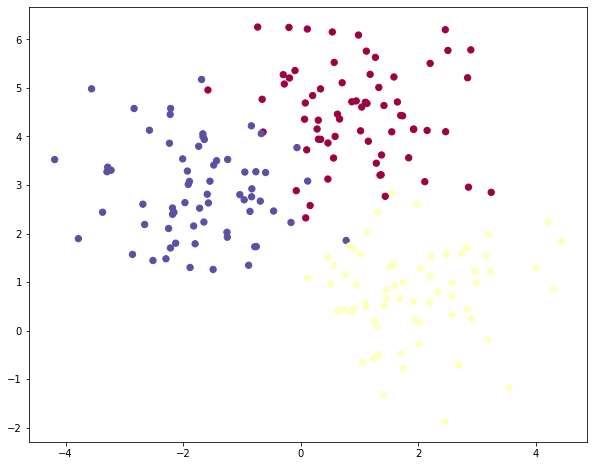

In [154]:
np.random.seed(0)
# X, y = sklearn.datasets.make_moons(200, noise=0.20)
X, y = sklearn.datasets.make_blobs(200)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

## Train model

In [155]:
NUMBER_OF_CLASSES = 3

Instead of numbered features, we will use orthogonal vectors

In [ ]:
def vectorize(x):
    vectors = np.array([[1,0,0], [0,1,0], [0,0,1]])
    return vectors[x]

In [157]:
y_maped = np.array(list(map(lambda x: vectorize(x), y)))

In this matrix, each row corresponds to the weights for one of the features.

In [ ]:
# initialize weights randomly with mean 0 - [-1; 1]
w = 2*np.random.random((3,NUMBER_OF_CLASSES,)) - 1

In [125]:
XWithOnesRow = addRowWithOnes(X)

In [168]:
LR = 0.22
NUMBER_OF_ITERATIONS = 100

for j in trange(NUMBER_OF_ITERATIONS):
    prediction = pred(w, XWithOnesRow)
    diff = y_maped - prediction
    normalized_diff = np.max(diff, axis=1)

    error = np.mean(np.abs(normalized_diff))
    print(error)

    # TODO: HERE SHOULD BE FIXED VERSION OF GRADIENT
    w = w + LR * np.dot(XWithOnesRow.T, normalized_diff)

 59%|█████▉    | 59/100 [00:00<00:00, 284.31it/s]

0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535


100%|██████████| 100/100 [00:00<00:00, 295.51it/s]

0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.53
0.535
0.53
0.535
0.53
0.535
0.53
0.535
